In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [3]:
df = pd.read_csv('./archive/Student_performance_data _.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None


In [4]:
df.dropna(inplace=True)
df.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


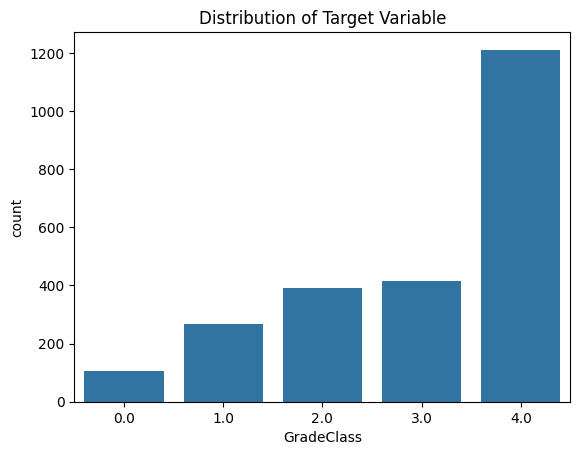

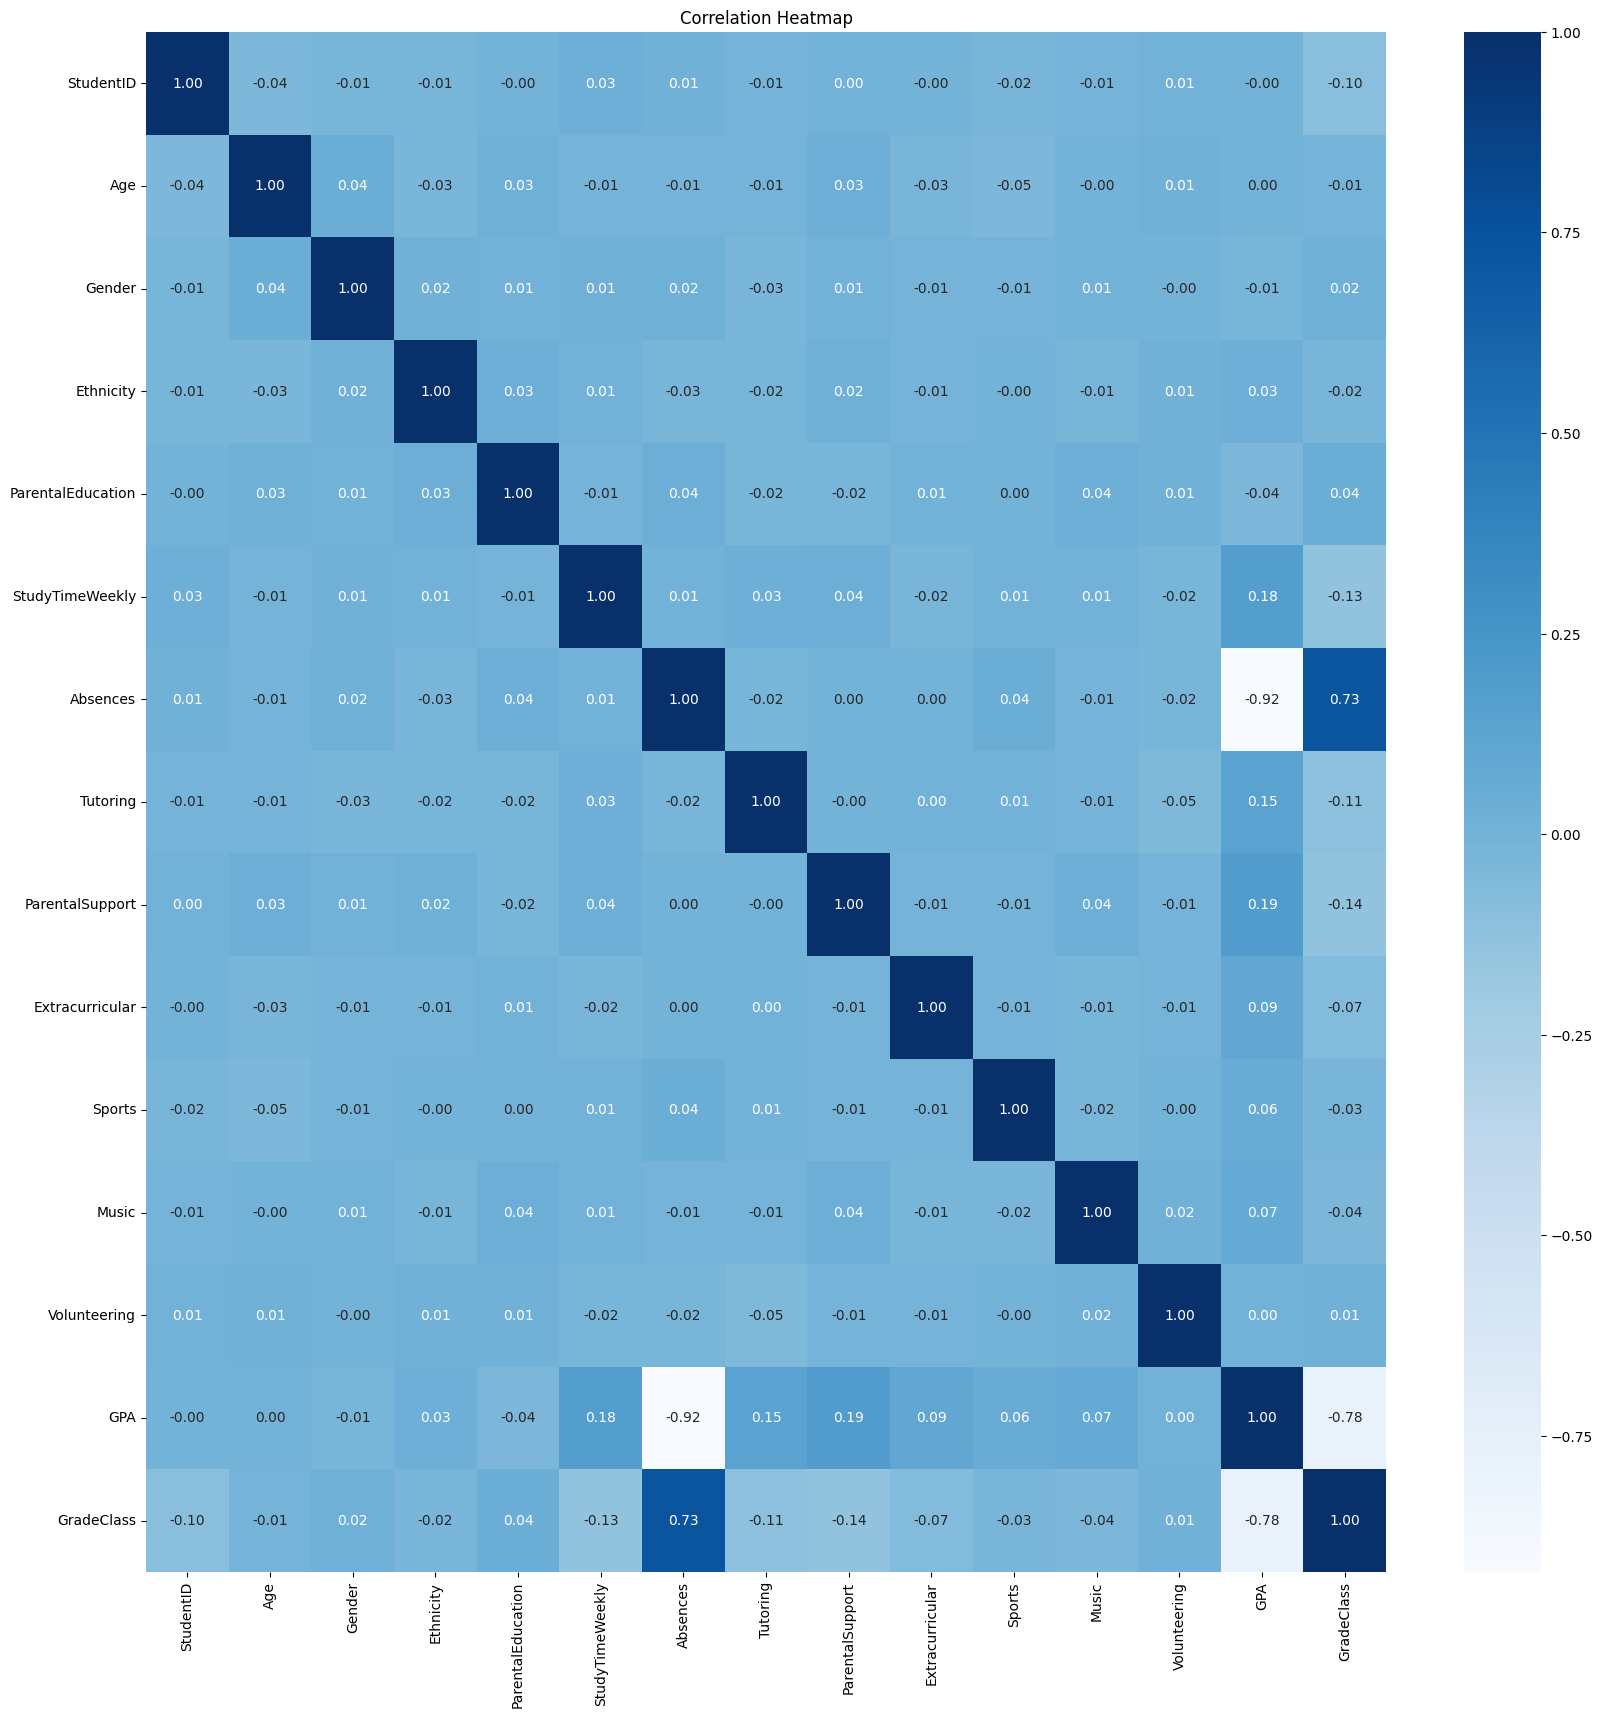

In [5]:
# Visualize the target variable distribution
sns.countplot(x='GradeClass', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Correlation heatmap (only for numeric features)
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 20))
sns.heatmap(df[numeric_features].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
from sklearn.preprocessing import OneHotEncoder


# Encode categorical variables
encoded = OneHotEncoder().fit_transform(df[['Ethnicity']])

# Split the data into features and target
X = df.drop(['GradeClass','GPA','StudentID'], axis=1)
y = df['GradeClass']

# Feature scaling
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [7]:
# Split the dataset into training and testing sets
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
y

0       2.0
1       1.0
2       4.0
3       3.0
4       4.0
       ... 
2387    0.0
2388    4.0
2389    2.0
2390    1.0
2391    1.0
Name: GradeClass, Length: 2392, dtype: float64

In [8]:
# Initialize and train the model
from sklearn.linear_model import LogisticRegression


model = RandomForestClassifier(random_state=42,n_estimators=10000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.09      0.15        23
         1.0       0.52      0.56      0.54        48
         2.0       0.56      0.57      0.56        88
         3.0       0.53      0.39      0.45        87
         4.0       0.82      0.95      0.88       233

    accuracy                           0.70       479
   macro avg       0.62      0.51      0.52       479
weighted avg       0.68      0.70      0.68       479

Confusion Matrix:


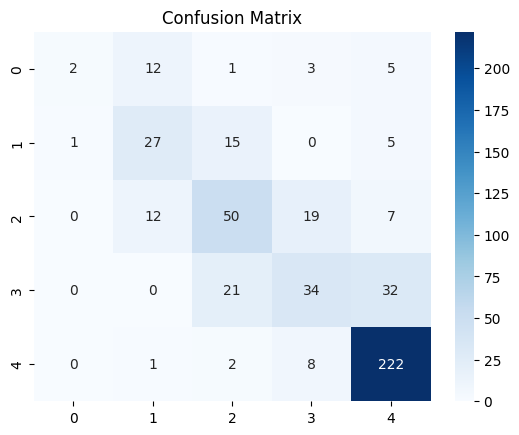

In [9]:
# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

                   importance
Absences             0.441637
StudyTimeWeekly      0.166391
ParentalSupport      0.068148
ParentalEducation    0.060449
Age                  0.058582
Ethnicity            0.052251
Gender               0.029325
Sports               0.028287
Extracurricular      0.028121
Tutoring             0.025531
Music                0.021665
Volunteering         0.019612


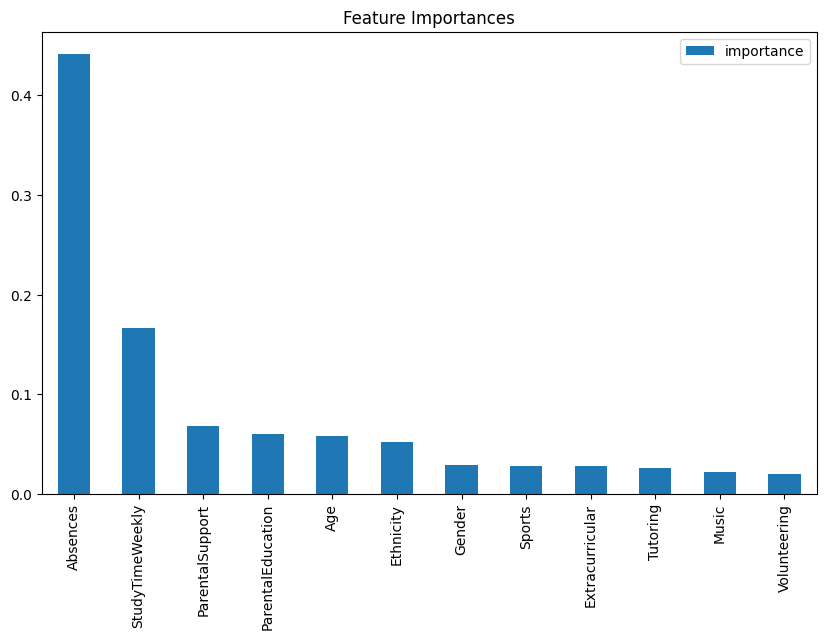

In [10]:
# Display feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Plot feature importance
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()